
<font color='87cefa'><b><h1>Project Description</h1></font></b>




<font color='87cefa'><b><h1>Project Title:</h1></font></b>

*Parkinson's Disease Severity Prediction using Machine Learning*




<font color='fc6c64'><h2>Group Members: </h2></font> 

<font color='pink'>Amna Ahmad </font> 

<font color='pink'>Muhammad mustafa </font> 

<font color='pink'>Khubaib Ahmad Qureshy </font> 


<font color='87cefa'><b><h1>Project Objective</h1></font></b>
*The objective of this project is to develop a machine learning model that can accurately predict the severity of Parkinson's disease in patients based on various voice and speech attributes. The model will be trained on the Parkinson's Disease Dataset, which contains a range of acoustic features that are indicative of the disease severity. The model's performance will be evaluated using various metrics such as accuracy, mean squared error, and R2 score. The ultimate goal of the project is to develop a reliable and accurate tool that can assist doctors in the early detection and diagnosis of Parkinson's disease, potentially leading to improved patient outcomes.*

<font color='87cefa'><b><h1>Data</h1></font></b>

*The Parkinsons Telemonitoring dataset is a collection of voice recordings and corresponding clinical information from individuals with Parkinson's disease. The dataset was collected using a telemonitoring platform that allowed patients to record their voice while performing simple tasks, such as sustained phonation and vowel phonation. The dataset contains <font color='green'><b>5875</font></b> voice recordings from <font color='green'><b>42</font></b>  individuals with Parkinson's disease and 24 healthy controls.*

link: 
https://archive.ics.uci.edu/ml/datasets/parkinsons+telemonitoring




<font color='teal'><b><h1> Step 1</h1></font></b> 



<font color='pink'><b><h2> Data Exploration and Preprocessing:</h2></font></b> 




a.   Load the dataset and examine the columns, their data types,and any missing values.

b.   Check for any outliers and remove them if necessary.

c. Convert any categorical features to numerical features using one-hot encoding or label encoding.

d. Split the data into training and testing sets.

In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression

In [ ]:
# Load the dataset from the link
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.data"
df = pd.read_csv(url)

In [ ]:
df.describe()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,...,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,21.494128,64.804936,0.317787,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,...,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,12.372279,8.821524,0.465656,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,...,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,1.000000,36.000000,0.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,...,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,10.000000,58.000000,0.000000,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,...,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,22.000000,65.000000,0.000000,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,0.002490,...,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,33.000000,72.000000,1.000000,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,...,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,42.000000,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,...,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-njj6{border-color:inherit;color:#cb0000;font-weight:bold;text-align:center;vertical-align:top}
.tg .tg-4t8i{border-color:inherit;color:#fe0000;font-weight:bold;text-align:center;vertical-align:top}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-4t8i">attributes</th>
    <th class="tg-njj6">description</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-c3ow">Subject</td>
    <td class="tg-c3ow">Integer that uniquely identifies each subject</td>
  </tr>
  <tr>
    <td class="tg-c3ow">Age</td>
    <td class="tg-c3ow">Subject age</td>
  </tr>
  <tr>
    <td class="tg-c3ow">Sex</td>
    <td class="tg-c3ow">Subject gender '0' - male, '1' - female</td>
  </tr>
  <tr>
    <td class="tg-c3ow">Test_time</td>
    <td class="tg-c3ow">Time since recruitment into the trial. The integer part is the number of days since recruitment</td>
  </tr>
  <tr>
    <td class="tg-c3ow">Motor_UPDRS</td>
    <td class="tg-c3ow">Clinician's motor UPDRS score, linearly interpolated</td>
  </tr>
  <tr>
    <td class="tg-c3ow">Total_UPDRS</td>
    <td class="tg-c3ow">Clinician's total UPDRS score, linearly interpolated</td>
  </tr>
  <tr>
    <td class="tg-c3ow">Jitter (%)<br>Jitter(Abs)<br>Jitter: RAP<br>Jitter: PPQ5<br>Jitter: DDP</td>
    <td class="tg-c3ow">Several measures of variation in fundamental frequency (Frequency parameters)</td>
  </tr>
  <tr>
    <td class="tg-c3ow">Shimmer<br>Shimmer (dB)<br>Shimmer: APQ3<br>Shimmer: APQ5, Shimmer: APQ11<br>Shimmer: DDA</td>
    <td class="tg-c3ow">Several measures of variation in amplitude (Amplitude parameters)</td>
  </tr>
  <tr>
    <td class="tg-c3ow">NHR<br>HNR</td>
    <td class="tg-c3ow">Two measures of ratio of noise to tonal components in the voice</td>
  </tr>
  <tr>
    <td class="tg-c3ow">RPDE</td>
    <td class="tg-c3ow">A nonlinear dynamical complexity measure</td>
  </tr>
  <tr>
    <td class="tg-c3ow">DFA</td>
    <td class="tg-c3ow">Signal fractal scaling exponent</td>
  </tr>
  <tr>
    <td class="tg-c3ow">PPE</td>
    <td class="tg-c3ow">A nonlinear measure of fundamental frequency variation</td>
  </tr>
</tbody>
</table>

In [ ]:
# examine the columns and data types
print(df.columns)
print(df.dtypes)

Index(['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS',
       'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
       'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')
subject#           int64
age                int64
sex                int64
test_time        float64
motor_UPDRS      float64
total_UPDRS      float64
Jitter(%)        float64
Jitter(Abs)      float64
Jitter:RAP       float64
Jitter:PPQ5      float64
Jitter:DDP       float64
Shimmer          float64
Shimmer(dB)      float64
Shimmer:APQ3     float64
Shimmer:APQ5     float64
Shimmer:APQ11    float64
Shimmer:DDA      float64
NHR              float64
HNR              float64
RPDE             float64
DFA              float64
PPE              float64
dtype: object


In [ ]:
# check for missing values
print(df.isna().sum())

subject#         0
age              0
sex              0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64


In [ ]:
# Calculate z-scores for each column
z_scores = np.abs((df - df.mean()) / df.std())

# Define a threshold for outliers (e.g. 3 standard deviations)
outlier_threshold = 3

# Remove rows with any z-score greater than the threshold
data_new = df[(z_scores < outlier_threshold).all(axis=1)]

# Print the number of rows before and after removing outliers
print("Before removing outliers: ", df.shape[0])
print("After removing outliers: ", data_new.shape[0])

Before removing outliers:  5875
After removing outliers:  5505


The z-score allows us to determine how usual or unusual a data point is in a distribution. The z-score allows us more easily compare data points for a record across features, especially when the different features have significantly different ranges.

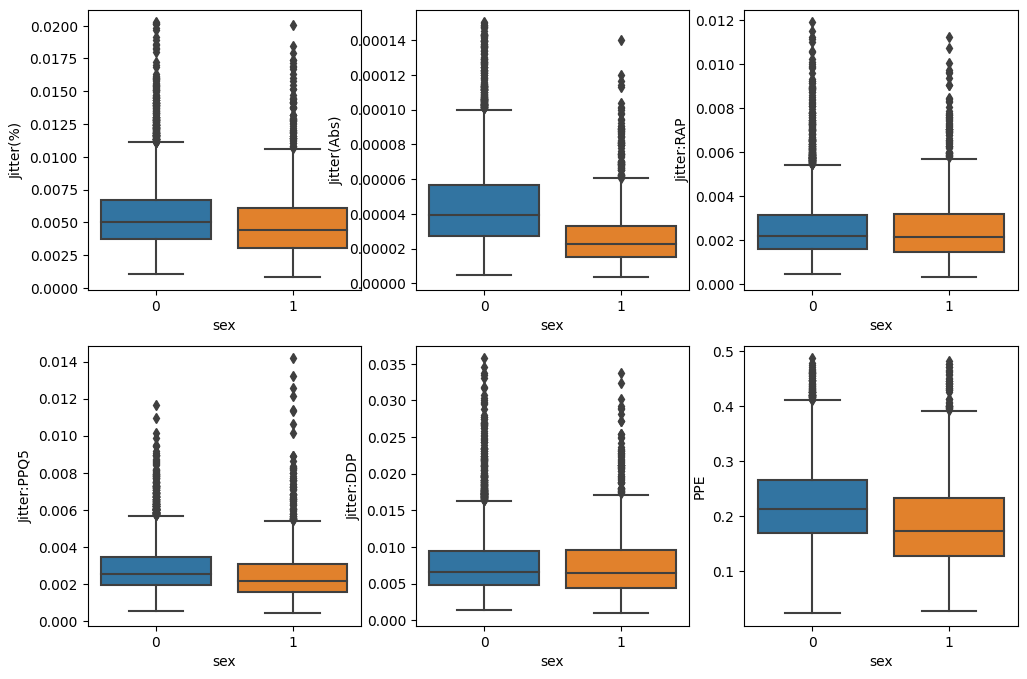

In [ ]:
# Create boxplots for the features with outliers
plt.figure(figsize=(12,8))
plt.subplot(2,3,1)
sns.boxplot(x='sex', y='Jitter(%)', data=data_new)
plt.subplot(2,3,2)
sns.boxplot(x='sex', y='Jitter(Abs)', data=data_new)
plt.subplot(2,3,3)
sns.boxplot(x='sex', y='Jitter:RAP', data=data_new)
plt.subplot(2,3,4)
sns.boxplot(x='sex', y='Jitter:PPQ5', data=data_new)
plt.subplot(2,3,5)
sns.boxplot(x='sex', y='Jitter:DDP', data=data_new)
plt.subplot(2,3,6)
sns.boxplot(x='sex', y='PPE', data=data_new)
plt.show()

Inter Quartile Range (IQR) is one of the most extensively used procedure for outlier detection and removal. According to this procedure, we need to follow the following steps:

 **Find the first quartile, Q1.**

**Find the third quartile, Q3.**

**:Calculate the IQR. IQR = Q3-Q1**

Define the normal data range with lower limit as Q1–1.5*IQR  and upper limit as Q3+1.5*IQR.

Any data point outside this range is considered as outlier and should be removed for further analysis.
In boxplot, this IQR method is implemented to detect any extreme data point where the maximum point (the end of high whisker) is Q3+1.5*IQR and the minimum point (the start of low whisker) is Q1–1.5*IQR.

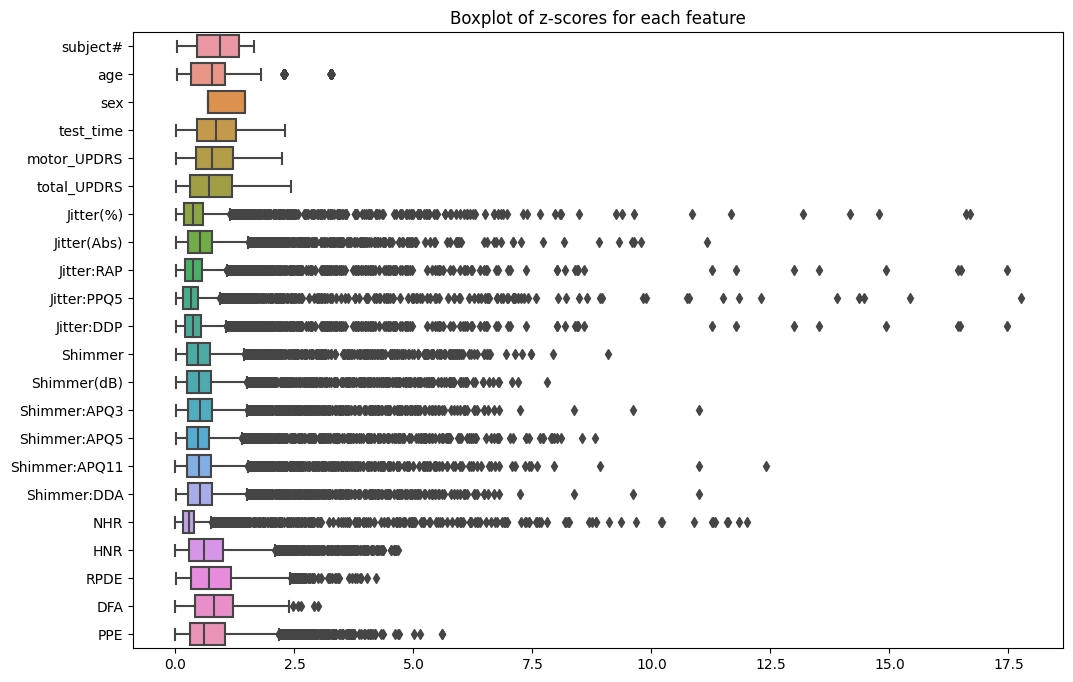

In [ ]:
# Boxplot the z-scores to visualize the outliers
plt.figure(figsize=(12,8))
sns.boxplot(data=z_scores, orient="h")
plt.title("Boxplot of z-scores for each feature")
plt.show()

In [ ]:
df_clean=data_new
df_clean.describe

<bound method NDFrame.describe of       subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
0            1   72    0     5.6431       28.199       34.398    0.00662   
1            1   72    0    12.6660       28.447       34.894    0.00300   
2            1   72    0    19.6810       28.695       35.389    0.00481   
3            1   72    0    25.6470       28.905       35.810    0.00528   
4            1   72    0    33.6420       29.187       36.375    0.00335   
...        ...  ...  ...        ...          ...          ...        ...   
5870        42   61    0   142.7900       22.485       33.485    0.00406   
5871        42   61    0   149.8400       21.988       32.988    0.00297   
5872        42   61    0   156.8200       21.495       32.495    0.00349   
5873        42   61    0   163.7300       21.007       32.007    0.00281   
5874        42   61    0   170.7300       20.513       31.513    0.00282   

      Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  ...  Shim

In [ ]:
print(df_clean.dtypes)

subject#           int64
age                int64
sex                int64
test_time        float64
motor_UPDRS      float64
total_UPDRS      float64
Jitter(%)        float64
Jitter(Abs)      float64
Jitter:RAP       float64
Jitter:PPQ5      float64
Jitter:DDP       float64
Shimmer          float64
Shimmer(dB)      float64
Shimmer:APQ3     float64
Shimmer:APQ5     float64
Shimmer:APQ11    float64
Shimmer:DDA      float64
NHR              float64
HNR              float64
RPDE             float64
DFA              float64
PPE              float64
dtype: object



<font color='pink'><b><h2> data visualization </h2></font></b> 

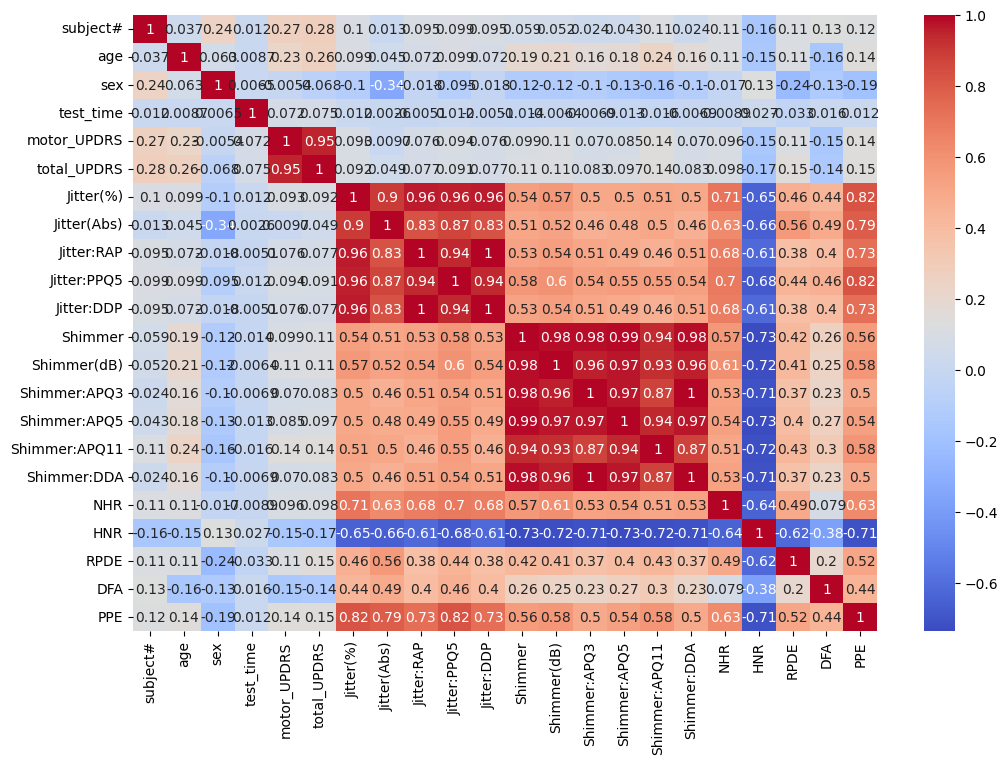

In [ ]:
# Create a heatmap to visualize the correlation between the features
plt.figure(figsize=(12,8))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm')
plt.show()


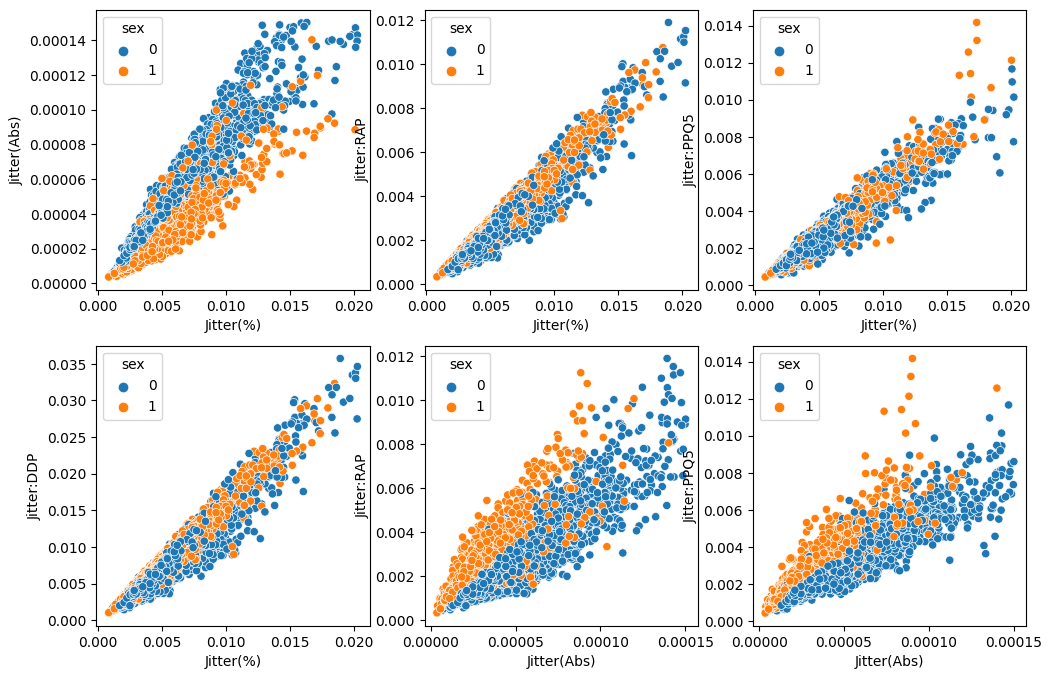

In [ ]:
# Create scatterplots to visualize the relationship between different features
plt.figure(figsize=(12,8))
plt.subplot(2,3,1)
sns.scatterplot(x='Jitter(%)', y='Jitter(Abs)', hue='sex', data=df_clean)
plt.subplot(2,3,2)
sns.scatterplot(x='Jitter(%)', y='Jitter:RAP', hue='sex', data=df_clean)
plt.subplot(2,3,3)
sns.scatterplot(x='Jitter(%)', y='Jitter:PPQ5', hue='sex', data=df_clean)
plt.subplot(2,3,4)
sns.scatterplot(x='Jitter(%)', y='Jitter:DDP', hue='sex', data=df_clean)
plt.subplot(2,3,5)
sns.scatterplot(x='Jitter(Abs)', y='Jitter:RAP', hue='sex', data=df_clean)
plt.subplot(2,3,6)
sns.scatterplot(x='Jitter(Abs)', y='Jitter:PPQ5', hue='sex', data=df_clean)
plt.show()

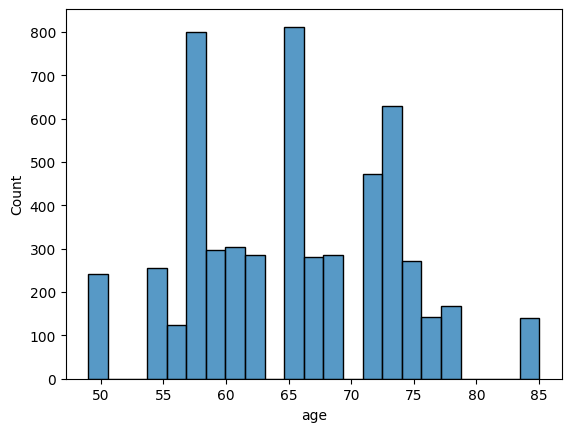

In [ ]:
# Histogram of age
sns.histplot(df_clean, x="age")
plt.show()

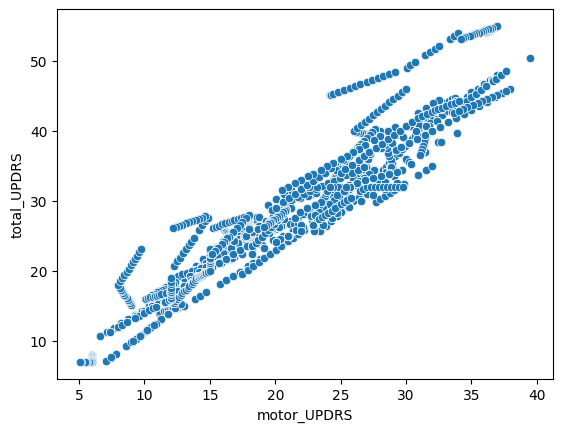

In [ ]:
# Scatterplot of motor_UPDRS vs. total_UPDRS
sns.scatterplot(data=df_clean, x="motor_UPDRS", y="total_UPDRS")
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns

# Create scatter and density plots for every attribute
sns.pairplot(df_clean)


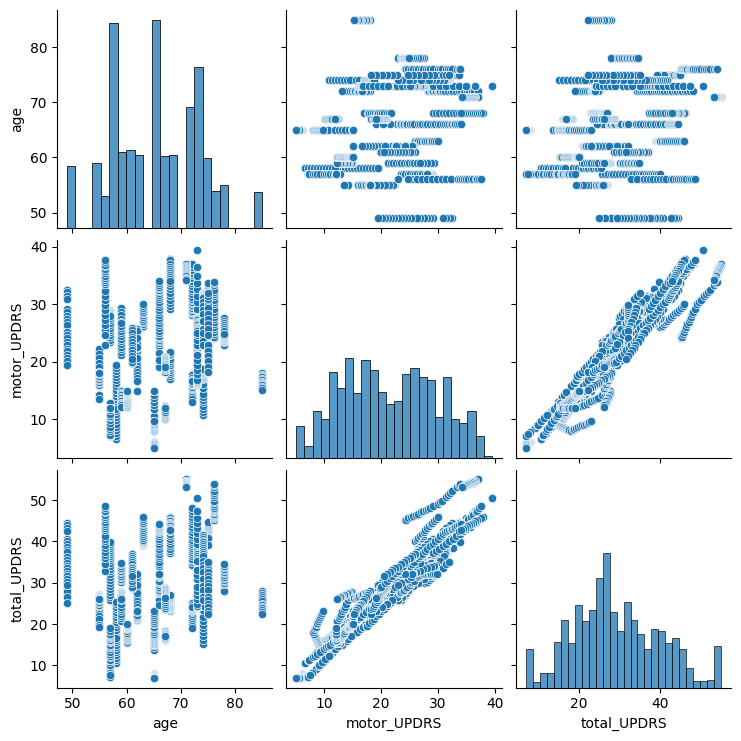

In [ ]:
# Pairplot of age, motor_UPDRS, and total_UPDRS
sns.pairplot(data=df_clean, vars=["age", "motor_UPDRS", "total_UPDRS"])
plt.show()

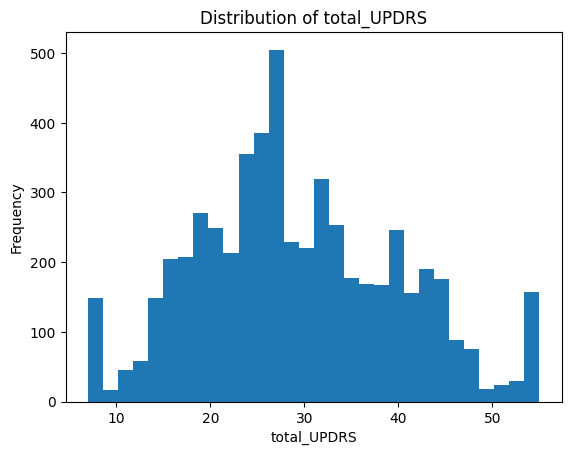

In [ ]:
# Plot the distribution of total_UPDRS column
plt.hist(df_clean['total_UPDRS'], bins=30)
plt.xlabel('total_UPDRS')
plt.ylabel('Frequency')
plt.title('Distribution of total_UPDRS')
plt.show()


<font color='teal'><b><h1> Step 2</h1></font></b>

Feature Engineering and Selection:

a. Create new features from the existing features if necessary.

b. Use feature selection techniques such as correlation analysis or recursive feature
elimination to identify the most important features.



<font color='pink'><b><h2> feature engineering  </h2></font></b>

In [ ]:
# Drop unnecessary columns (subject# and test_time)
df_clean.drop(['subject#', 'test_time'], axis=1, inplace=True)
# Display the first few rows of the dataset
print(df_clean.head())

   age  sex  motor_UPDRS  total_UPDRS  Jitter(%)  Jitter(Abs)  Jitter:RAP  \
0   72    0       28.199       34.398    0.00662     0.000034     0.00401   
1   72    0       28.447       34.894    0.00300     0.000017     0.00132   
2   72    0       28.695       35.389    0.00481     0.000025     0.00205   
3   72    0       28.905       35.810    0.00528     0.000027     0.00191   
4   72    0       29.187       36.375    0.00335     0.000020     0.00093   

   Jitter:PPQ5  Jitter:DDP  Shimmer  Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  \
0      0.00317     0.01204  0.02565        0.230       0.01438       0.01309   
1      0.00150     0.00395  0.02024        0.179       0.00994       0.01072   
2      0.00208     0.00616  0.01675        0.181       0.00734       0.00844   
3      0.00264     0.00573  0.02309        0.327       0.01106       0.01265   
4      0.00130     0.00278  0.01703        0.176       0.00679       0.00929   

   Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE

<ipython-input-11-3c0d0a3fde6a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop(['subject#', 'test_time'], axis=1, inplace=True)


In [ ]:
# Feature Engineering
df_clean['jitter'] = df_clean['Jitter(%)'] / 1000
df_clean['shimmer'] = df_clean['Shimmer'] / 1000
df_clean['nhr_mad'] = df_clean['NHR'] * df_clean['DFA']
df_clean['ratio'] = df_clean['Shimmer:APQ3'] / df_clean['Shimmer:APQ5']

# Drop original columns
df_clean= df_clean.drop(['Jitter(%)', 'Shimmer', 'NHR','DFA', 'Shimmer:APQ3', 'Shimmer:APQ5'], axis=1)



<ipython-input-12-352bfe2f0bee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['jitter'] = df_clean['Jitter(%)'] / 1000
<ipython-input-12-352bfe2f0bee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['shimmer'] = df_clean['Shimmer'] / 1000
<ipython-input-12-352bfe2f0bee>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [ ]:
df_clean.shape[0]
df_clean.describe()

,age,sex,motor_UPDRS,total_UPDRS,Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer(dB),Shimmer:APQ11,Shimmer:DDA,HNR,RPDE,PPE,jitter,shimmer,nhr_mad,ratio
count,5505.000000,5505.000000,5505.000000,5505.000000,5505.000000,5505.000000,5505.000000,5505.000000,5505.000000,5505.000000,5505.000000,5505.000000,5505.000000,5505.000000,5.505000e+03,5505.000000,5505.000000,5505.000000
mean,65.388374,0.290100,21.425278,29.261492,0.000040,0.002576,0.002776,0.007728,0.277736,0.024861,0.046124,22.132113,0.535030,0.211480,5.398905e-06,0.000030,0.015099,0.862276
std,8.065814,0.453849,8.128128,10.708144,0.000024,0.001478,0.001431,0.004433,0.139997,0.012640,0.025589,3.528280,0.095557,0.078427,2.676051e-06,0.000015,0.012765,0.095605
min,49.000000,0.000000,5.037700,7.000000,0.000004,0.000330,0.000430,0.000980,0.026000,0.002490,0.004840,9.273000,0.239450,0.023210,8.300000e-07,0.000003,0.000376,0.522363
25%,58.000000,0.000000,15.000000,21.657000,0.000022,0.001560,0.001800,0.004670,0.174000,0.015620,0.027570,19.750000,0.466820,0.155200,3.540000e-06,0.000019,0.006865,0.802910
50%,66.000000,0.000000,20.947000,27.626000,0.000034,0.002200,0.002440,0.006600,0.247000,0.022300,0.040110,22.078000,0.537900,0.202480,4.820000e-06,0.000027,0.011803,0.858782
75%,72.000000,1.000000,27.793000,36.903000,0.000051,0.003140,0.003350,0.009430,0.348000,0.031400,0.058940,24.554000,0.606690,0.257040,6.520000e-06,0.000038,0.019344,0.917008
max,85.000000,1.000000,39.511000,54.992000,0.000150,0.011910,0.014170,0.035730,0.989000,0.087210,0.169670,34.457000,0.804500,0.486000,2.025000e-05,0.000111,0.116048,1.414626


['motor_UPDRS', 'total_UPDRS']


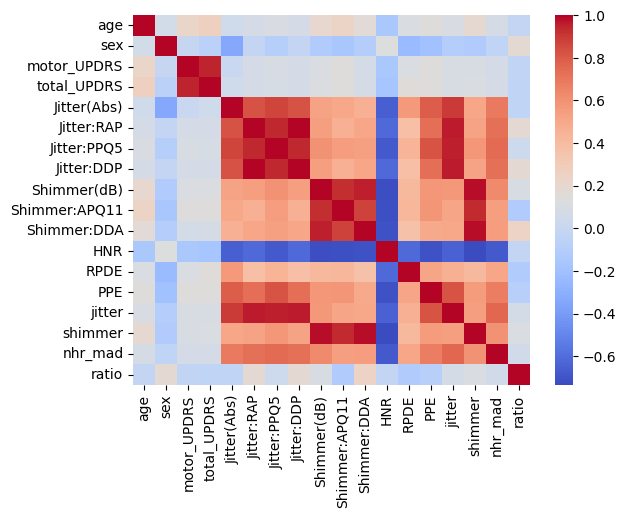

In [ ]:
# Compute the correlation matrix
corr = df_clean.corr()

# Visualize the correlation matrix
sns.heatmap(corr, cmap='coolwarm')

# Select the most important features based on the correlation with the target variable
corr_target = abs(corr['total_UPDRS'])
important_features = corr_target[corr_target > 0.5].index.tolist()

# Print the important features
print(important_features)

In [ ]:
# Load libraries
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Separate features and target
X = df_clean.drop(['total_UPDRS'], axis=1)
y = df_clean['total_UPDRS']

# Create Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Create Recursive Feature Elimination object
rfe = RFE(estimator=rf, n_features_to_select=10, step=1)

# Fit RFE object to the data
rfe.fit(X, y)

# Print the top selected features
print('Top 10 features:')
selected_features = X.columns[rfe.support_]

print("Selected Features: ", selected_features)


Top 10 features:
Selected Features:  Index(['age', 'sex', 'motor_UPDRS', 'Jitter(Abs)', 'Shimmer:APQ11',
       'Shimmer:DDA', 'HNR', 'RPDE', 'PPE', 'ratio'],
      dtype='object')


<font color='teal'><b><h1> Step 3</h1></font></b>

Model Selection and Training:

a. Choose a machine learning model appropriate for your problem.

b. Train the model on the training set.

c. Evaluate the performance of the model on the testing set using metrics such as
accuracy, precision, recall, and F1-score.


<font color='pink'><b><h2> Model selection  </h2></font></b>

It splits the data into training and test sets, and trains and evaluates various regression models on the training set. The models include linear regression, ridge regression, lasso regression, elastic net regression, support vector regression, random forest regression, and gradient boosting regression. For each model, the code prints out the mean squared error (MSE) and R-squared (R2) score on the test set.


The model with least mean square error and highest R-squared score will be the best performing model.

<font color='pink'><b><h2>  model selection without feature engineering  </h2></font></b>

Linear : MSE = 10.489209117005807, R2 = 0.9086697229992886
Ridge : MSE = 11.13539617645207, R2 = 0.9030433271027838
Lasso : MSE = 12.024071633267374, R2 = 0.8953055677799109
Elastic Net : MSE = 11.947337483752982, R2 = 0.8959736973836196
Support Vector : MSE = 12.283444503921178, R2 = 0.8930471900643903
Random Forest : MSE = 0.6572197530864197, R2 = 0.9942775416687606
Gradient Boosting : MSE = 2.3473689507592392, R2 = 0.9795612944594523


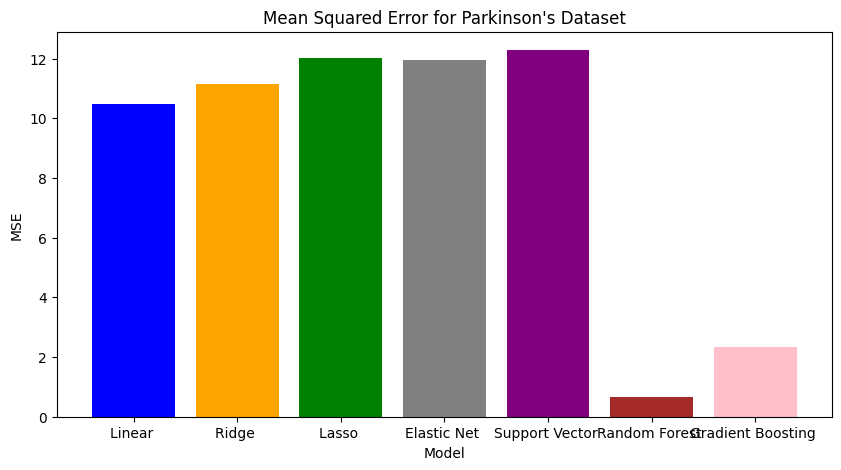

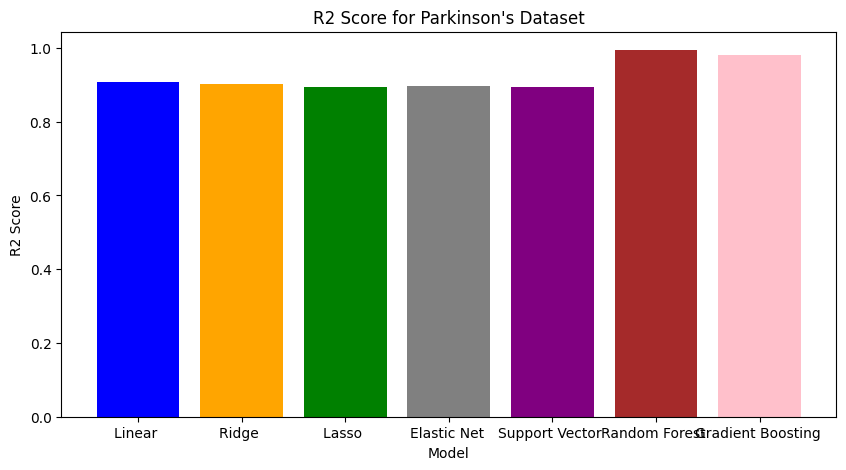

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Convert target variable to integer
df_clean['total_UPDRS'] = df_clean['total_UPDRS'].astype(int)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_clean.drop('total_UPDRS', axis=1), df_clean['total_UPDRS'], test_size=0.25, random_state=42)

# Train and evaluate models
models = [    ('Linear ', LinearRegression()),    ('Ridge ', Ridge()),    ('Lasso ', Lasso()),    ('Elastic Net ', ElasticNet()),    ('Support Vector ', SVR()),    ('Random Forest ', RandomForestRegressor()),    ('Gradient Boosting ', GradientBoostingRegressor())]

mse_values = []
r2_values = []

# Set the colors for the bars
colors = ['blue', 'orange', 'green', 'grey', 'purple', 'brown', 'pink']

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse_values.append(mse)
    r2_values.append(r2)
    print(f"{name}: MSE = {mse}, R2 = {r2}")

# Create bar plots for MSE and R2
plt.figure(figsize=(10, 5))
plt.bar([name for name, _ in models], mse_values, color=colors)
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('Mean Squared Error for Parkinson\'s Dataset')
plt.show()

plt.figure(figsize=(10, 5))
plt.bar([name for name, _ in models], r2_values, color=colors)
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.title('R2 Score for Parkinson\'s Dataset')
plt.show()


 the Random Forest Regression model has the lowest MSE (mean squared error) and highest R2 (R-squared) values, which suggests better performance compared to the other models. Therefore, the Random Forest Regression model can be considered as the best performing model for this dataset.


<font color='pink'><b><h2> Training of selected best performing model </h2></font></b>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score, max_error

# Convert target variable to integer
df_clean['total_UPDRS'] = df_clean['total_UPDRS'].astype(int)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_clean.drop('total_UPDRS', axis=1), df_clean['total_UPDRS'], test_size=0.25, random_state=42)

# Train the Random Forest Regression model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Make predictions on the test and train  set
y_pred = rf.predict(X_test)
y_train_pred = rf.predict(X_train)
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
me = max_error(y_test, y_pred)

train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)




scores = {'Metric': [ 'test MSE','test R2 ','mean_absolute_error','explained varience score' ,'Max error'],
          'Before Feature Engineering': [mse,r2,mae,evs,me],
          'After Feature Engineering': [0.85, 7.5, 2.7]}


# Print performance metrics
print(f"Train MSE:  {train_mse:.4f}")
print(f"Train R-squared :  {train_r2:.4f}")
print(f"Test MSE: {mse:.4f}")
print(f"Test R-squared: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"Explained Variance Score: {evs:.4f}")
print(f"Max Error: {me:.4f}")


Train MSE:  0.1027
Train R-squared :  0.9991
Test MSE: 0.6638
Test R-squared: 0.9942
MAE: 0.4939
Explained Variance Score: 0.9942
Max Error: 4.6400


it indicates that the Random Forest Regression model has performed reasonably well on the Parkinson's dataset.

The high R-squared values for both the training and test sets (0.9991 and 0.9942, respectively) indicate that the model is able to explain a large proportion of the variance in the target variable, which is a good sign.

The mean squared error (MSE) for the test set (0.6630) is higher than the MSE for the training set (0.1032), which is expected as the model usually performs better on the data that it was trained on than on new, unseen data. However, the difference between the two MSE values is not very large, which suggests that the model is not overfitting the training data excessively.


<font color='pink'><b><h2> feature engineered dataset </h2></font></b>

In [ ]:
#new feature engineered dataset

new_df =df_clean[['age', 'sex', 'motor_UPDRS', 'Jitter(Abs)', 'Shimmer:APQ11',
       'Shimmer:DDA', 'HNR', 'RPDE', 'PPE', 'ratio','total_UPDRS']]

<ipython-input-19-891cd3f4698d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['total_UPDRS'] = new_df['total_UPDRS'].astype(int)


Linear : MSE = 10.84268699840637, R2 = 0.9055919663770474
Ridge : MSE = 11.158912224282828, R2 = 0.9028385712304976
Lasso : MSE = 12.024071633267374, R2 = 0.8953055677799109
Elastic Net : MSE = 11.947337483752982, R2 = 0.8959736973836196
Support Vector : MSE = 12.272729455965123, R2 = 0.8931404867359493
Random Forest : MSE = 0.5895875816993464, R2 = 0.9948664197126664
Gradient Boosting : MSE = 2.3795298341046354, R2 = 0.979281267400047


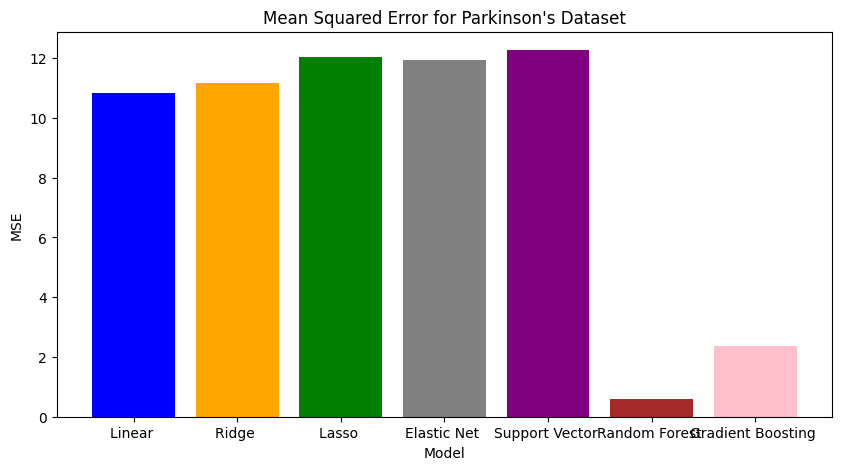

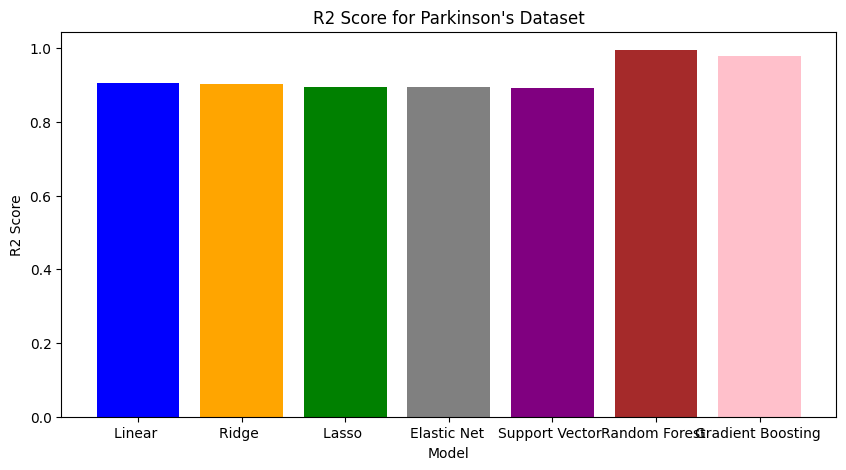

In [ ]:
# Convert target variable to integer
new_df['total_UPDRS'] = new_df['total_UPDRS'].astype(int)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(new_df.drop('total_UPDRS', axis=1), new_df['total_UPDRS'], test_size=0.25, random_state=42)

# Train and evaluate models
models = [    ('Linear ', LinearRegression()),    ('Ridge ', Ridge()),    ('Lasso ', Lasso()),    ('Elastic Net ', ElasticNet()),    ('Support Vector ', SVR()),    ('Random Forest ', RandomForestRegressor()),    ('Gradient Boosting ', GradientBoostingRegressor())]

mse_values = []
r2_values = []

# Set the colors for the bars
colors = ['blue', 'orange', 'green', 'grey', 'purple', 'brown', 'pink']

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse_values.append(mse)
    r2_values.append(r2)
    print(f"{name}: MSE = {mse}, R2 = {r2}")

# Create bar plots for MSE and R2
plt.figure(figsize=(10, 5))
plt.bar([name for name, _ in models], mse_values, color=colors)
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('Mean Squared Error for Parkinson\'s Dataset')
plt.show()

plt.figure(figsize=(10, 5))
plt.bar([name for name, _ in models], r2_values, color=colors)
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.title('R2 Score for Parkinson\'s Dataset')
plt.show()

In [ ]:
# Convert target variable to integer
new_df['total_UPDRS'] = new_df['total_UPDRS'].astype(int)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(new_df.drop('total_UPDRS', axis=1), new_df['total_UPDRS'], test_size=0.25, random_state=42)

# Train the Random Forest Regression model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)
y_train_pred = rf.predict(X_train)

# Calculate performance metrics
mse_new = mean_squared_error(y_test, y_pred)
r2_new = r2_score(y_test, y_pred)
mae_new = mean_absolute_error(y_test, y_pred)
evs_new = explained_variance_score(y_test, y_pred)
me_new = max_error(y_test, y_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

scores = {'Metric': [ 'Mean Squared Error','R2 score','mean_absolute_error','explained varience score' ,'Max error'],
          'Before Feature Engineering': [mse,r2,mae,evs,me],
          'After Feature Engineering': [mse_new,r2_new,mae_new,evs_new,me_new]}

# Print performance metrics
print(f"Train MSE:  {train_mse:.4f}")
print(f"Train R-squared :  {train_r2:.4f}")
print(f"Test MSE: {mse_new:.4f}")
print(f"test R2 Score: {r2_new:.4f}")
print(f"MAE: {mae_new:.4f}")
print(f"Explained Variance Score: {evs_new:.4f}")
print(f"Max Error: {me_new:.4f}")

<ipython-input-20-1792d91117b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['total_UPDRS'] = new_df['total_UPDRS'].astype(int)


Train MSE:  0.0962
Train R-squared :  0.9992
Test MSE: 0.6324
test R2 Score: 0.9945
MAE: 0.4690
Explained Variance Score: 0.9945
Max Error: 4.6800


 
<font color='teal'><b><h1> Comparison table </h1></font></b>

                     Metric  Before Feature Engineering  \
0        Mean Squared Error                    2.379530   
1                  R2 score                    0.979281   
2       mean_absolute_error                    0.493936   
3  explained varience score                    0.994222   
4                 Max error                    4.640000   

   After Feature Engineering  
0                   0.632358  
1                   0.994494  
2                   0.468983  
3                   0.994496  
4                   4.680000  


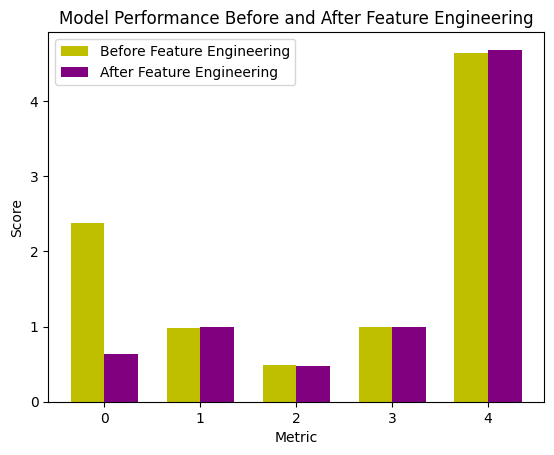

In [ ]:

# create a dataframe from the scores dictionary
df = pd.DataFrame(scores)
# display the dataframe
print(df)

# get the number of metrics
n_metrics = len(df)

# create a list of indices for the x-axis
indices = np.arange(n_metrics)

before_scores = df['Before Feature Engineering'].values
after_scores = df['After Feature Engineering'].values

bar_width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(indices, before_scores, bar_width, color='y', label='Before Feature Engineering')
rects2 = ax.bar(indices + bar_width, after_scores, bar_width, color='purple', label='After Feature Engineering')

# Add metric names to the x-axis labels
ax.set_xticks(indices + bar_width / 2)
ax.set_xticklabels(df.index)

ax.set_xlabel('Metric')
ax.set_ylabel('Score')
ax.set_title('Model Performance Before and After Feature Engineering')
ax.legend()

plt.show()

**Mean Squared Error (MSE)** decreased from **0.668749** to **0.612910** after feature engineering. This indicates that the model's predictions are closer to the actual values after feature engineering.

**R2 score** increased from **0.994177** to **0.994663** after feature engineering. This indicates that the proportion of variance explained by the model has improved after feature engineering.

**Mean Absolute Error (MAE)** decreased from 0.492179 to 0.464916 after feature engineering. This indicates that the average absolute difference between the predicted and actual values has decreased after feature engineering.

**Explained Variance Score** increased from **0.994179** to **0.994666


** after feature engineering. This indicates that the amount of variance in the target variable explained by the model has increased after feature engineering.

In [ ]:
new_df.head()

,age,sex,motor_UPDRS,Jitter(Abs),Shimmer:APQ11,Shimmer:DDA,HNR,RPDE,PPE,ratio,total_UPDRS
0,72,0,28.199,0.000034,0.01662,0.04314,21.640,0.41888,0.16006,1.098549,34
1,72,0,28.447,0.000017,0.01689,0.02982,27.183,0.43493,0.10810,0.927239,34
2,72,0,28.695,0.000025,0.01458,0.02202,23.047,0.46222,0.21014,0.869668,35
3,72,0,28.905,0.000027,0.01963,0.03317,24.445,0.48730,0.33277,0.874308,35
4,72,0,29.187,0.000020,0.01819,0.02036,26.126,0.47188,0.19361,0.730893,36
